# **Week 12. Homework 8. Pandas**



---



---



---



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


1. Load the dataset into a pandas DataFrame and display the first few rows.

In [11]:
data=pd.read_csv("Startups.csv",
                na_values=[0,".","NA","None","NANN"])

data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94




---



---




2. Find the number of rows and columns in the dataset.




In [12]:
data.shape #(rows,columns)


(50, 5)




---


---



3. Check for missing values in each column and handle them appropriately.




In [36]:
null_values=data.isnull().sum()
print(f"null count pre-cleaning:\n{null_values}")

print(" ")

drop_null=data.dropna()
print(f"null count post-cleaning (dropped row containing null value):\n{drop_null.isnull().sum()}")


null count pre-cleaning:
R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64
 
null count post-cleaning (dropped row containing null value):
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64





---


---



4. Calculate the mean, median, and standard deviation of the 'R&D_Spend' column.



In [6]:
print("mean: ",data["R&D Spend"].mean())
print("median: ",data["R&D Spend"].median())
print("standard deviation: ",data["R&D Spend"].std())


mean:  73721.6156
median:  73051.08
standard deviation:  45902.25648230753





---


---



5. Filter and create a new DataFrame containing companies located in a **California**.



In [7]:
data_CA=data[data["State"]=="California"]
data_CA.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
6,134615.46,147198.87,127716.82,California,156122.51
9,123334.88,108679.17,304981.62,California,149759.96
11,100671.96,91790.61,249744.55,California,144259.40
13,91992.39,135495.07,252664.93,California,134307.35





---


---



6. Sort the dataset by 'Profit' in descending order.



In [8]:
decs_data=data.sort_values(by=["Profit"],ascending=False)
decs_data.head(10)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96





---


---



7. Group the data by 'State' and calculate the total 'Profit' for each state.



In [9]:
state_profit=data.groupby("State").agg({"Profit":"sum"}).reset_index()
state_profit


,State,Profit
0,California,1766387.98
1,Florida,1900384.39
2,New York,1933859.59





---


---



8. Create a bar chart to visualize the total 'Profit' by 'State.'



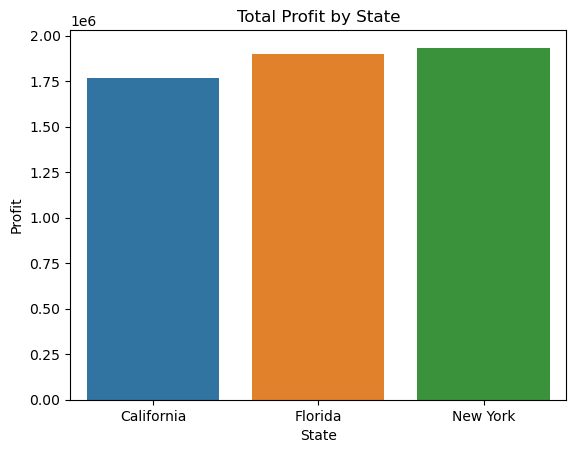

In [10]:
sns.barplot(data=state_profit,x="State",y="Profit")

plt.title("Total Profit by State")

plt.show()





---


---



9. Calculate the correlation between 'R&D_Spend' and 'Profit.'



In [34]:
correlation=data["R&D Spend"].corr(data["Profit"])

print(f" r: {correlation}")
print(" \nshows strong and positive correlation")


 r: 0.9774014412463116
 
shows strong and positive correlation




---



---



---



10. Create a new column 'Total_Spend' that represents the sum of 'R&D_Spend,' 'Administration,' and 'Marketing_Spend' for each company.



In [11]:
data["Total_Spend"]=data["R&D Spend"]+data["Administration"]+data["Marketing Spend"]
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53


11. Calculate the average **R&D_Spend**, **Administration**, and **Marketing_Spend** for companies located in each **State**



In [39]:
data.groupby("State").agg({"R&D Spend":"mean","Administration":"mean","Marketing Spend":"mean"}).reset_index()


,State,R&D Spend,Administration,Marketing Spend
0,California,73278.697333,120746.507059,193949.737500
1,Florida,80724.016250,121768.897500,247323.551250
2,New York,76195.062353,121543.470588,232725.484667




---



---



12. Create a histogram to visualize the distribution of 'Profit.'



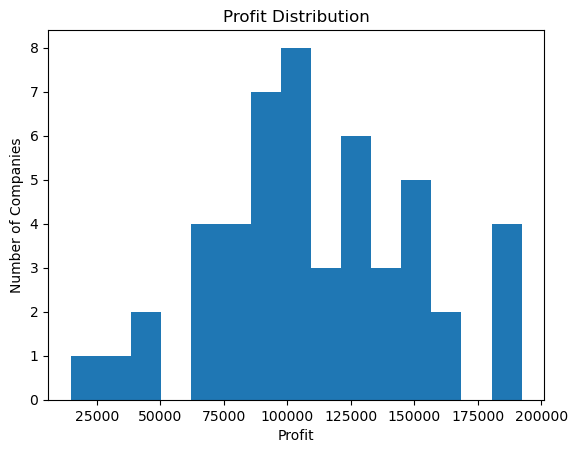

In [40]:
plt.hist(data["Profit"], bins=15)

plt.xlabel("Profit")
plt.ylabel("Number of Companies")
plt.title("Profit Distribution")

plt.show()




---



---



13. Filter the dataset to include only companies with 'R&D_Spend' greater than a 12000.



In [20]:
RD_12000=data[data["R&D Spend"]>12000]

RD_12000.head(10)


,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53
5,131876.90,99814.71,362861.36,New York,156991.12,594552.97
6,134615.46,147198.87,127716.82,California,156122.51,409531.15
7,130298.13,145530.06,323876.68,Florida,155752.60,599704.87
8,120542.52,148718.95,311613.29,New York,152211.77,580874.76
9,123334.88,108679.17,304981.62,California,149759.96,536995.67




---



---



14. Calculate the total 'Profit' for companies with 'Marketing_Spend' above a certain threshold.



In [31]:
MS_300000=data[data["Marketing Spend"]>300000]

MS_300000

ProfitTotal_300000=MS_300000["Profit"].sum()

print(f"total profit for companies with Marketing Spend over 300,000: \n{ProfitTotal_300000}")
      

total profit for companies with Marketing Spend over 300,000: 
1863004.21


15. Replace any missing values in the 'Marketing_Spend' column with the mean spending of the dataset.



In [22]:
avg_MS=data["Marketing Spend"].mean()

MS_filled=data.fillna({"Marketing Spend":avg_MS})

print(f"average Marketing Spend: {avg_MS}\n ")
print(MS_filled)


average Marketing Spend: 224494.78489361703
 
    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80    471784.100000    New York  192261.83
1   162597.70       151377.59    443898.530000  California  191792.06
2   153441.51       101145.55    407934.540000     Florida  191050.39
3   144372.41       118671.85    383199.620000    New York  182901.99
4   142107.34        91391.77    366168.420000     Florida  166187.94
5   131876.90        99814.71    362861.360000    New York  156991.12
6   134615.46       147198.87    127716.820000  California  156122.51
7   130298.13       145530.06    323876.680000     Florida  155752.60
8   120542.52       148718.95    311613.290000    New York  152211.77
9   123334.88       108679.17    304981.620000  California  149759.96
10  101913.08       110594.11    229160.950000     Florida  146121.95
11  100671.96        91790.61    249744.550000  California  144259.40
12   93863.75       127320.38    249839.4400




---


---



16. Create a new column 'Profit_Margin' that represents the profit margin for each company (Profit / Total_Spend).



In [23]:
data["Profit_Margin"]=data["Profit"]/data["Total_Spend"]
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend,Profit_Margin
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10,0.248390
1,162597.70,151377.59,443898.53,California,191792.06,757873.82,0.253066
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60,0.288369
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88,0.283023
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53,0.277133




---



---



---



17. Sort the dataset by 'Profit_Margin' in descending order.



In [28]:
sort_data=data.sort_values("Profit_Margin",ascending=False)
sort_data.head(10)


,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend,Profit_Margin
48,542.05,51743.15,0.00,New York,35673.41,52285.20,0.682285
19,86419.70,153514.11,0.00,New York,122776.86,239933.81,0.511711
45,1000.23,124153.04,1903.93,New York,64926.08,127057.20,0.510999
32,63408.86,129219.61,46085.25,California,97427.84,238713.72,0.408137
43,15505.73,127382.30,35534.17,New York,69758.98,178422.20,0.390977
6,134615.46,147198.87,127716.82,California,156122.51,409531.15,0.381223
30,61994.48,115641.28,91131.24,Florida,99937.59,268767.00,0.371837
24,77044.01,99281.34,140574.81,New York,108552.04,316900.16,0.342543
10,101913.08,110594.11,229160.95,Florida,146121.95,441668.14,0.330841
11,100671.96,91790.61,249744.55,California,144259.40,442207.12,0.326226




---



---



18. Calculate the average profit margin for companies in each 'State' and create a bar chart to display it.



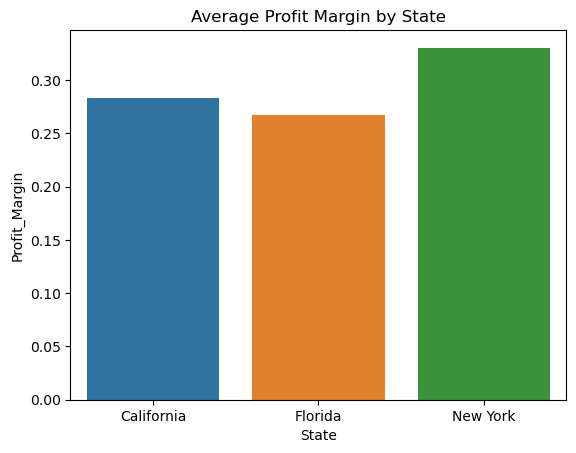

In [29]:
state_profitmargin=data.groupby("State").agg({"Profit_Margin":"mean"}).reset_index()
state_profitmargin.head()

sns.barplot(data=state_profitmargin,x="State",y="Profit_Margin")

plt.title("Average Profit Margin by State")

plt.show()




---



---



---



19. Find the maximum 'R&D_Spend' in each **State**.



In [30]:
state_maxprofitmargin=data.groupby("State").agg({"Profit_Margin":"max"}).reset_index()

state_maxprofitmargin


,State,Profit_Margin
0,California,0.408137
1,Florida,0.371837
2,New York,0.682285
